<a href="https://colab.research.google.com/github/MohammadAliAfsahi/Machine-Learning-and-Deep-Learning/blob/master/Ensemble_Learning_and_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_moons, load_iris, fetch_openml

from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingRegressor

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, mean_squared_error

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

import numpy as np

import matplotlib.pyplot as plt

import matplotlib as mpl

from matplotlib.colors import ListedColormap

In [0]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Voting Classifier

In [0]:
log_clf = LogisticRegression(solver='liblinear', random_state=42)

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)

svm_clf = SVC(gamma="auto", probability=True, random_state=42)

voting_clf = VotingClassifier(estimators=[('log_reg', log_clf), ('rnd_forest', rnd_clf), ('svc', svm_clf)], voting='hard')

In [4]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rnd_forest',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     c...
                                        

In [5]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


In [6]:
voting_clf = VotingClassifier(estimators=[('log_reg', log_clf), ('rnd_forest', rnd_clf), ('svc', svm_clf)], voting='soft')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rnd_forest',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     c...
                                        

In [7]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


# Bagging And Pasting

In [0]:
# 500 decision trees, using bagging ensemble learning, and use all CPU core available(n_jobs=-1)
bag_clf = BaggingClassifier( DecisionTreeClassifier(random_state=42), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True,
                            random_state=42)

bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

In [9]:
print('Accuracy using bagging: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy using bagging: 0.904


In [10]:
tree_clf = DecisionTreeClassifier(random_state=42)

tree_clf.fit(X_train, y_train)

y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

0.856


In [11]:
bag_clf.oob_score_

0.9253333333333333

In [12]:
y_prediction = bag_clf.predict(X_test)

accuracy_score(y_test, y_prediction)

0.904

In [13]:
bag_clf.oob_decision_function_

array([[0.35849057, 0.64150943],
       [0.43513514, 0.56486486],
       [1.        , 0.        ],
       [0.0128866 , 0.9871134 ],
       [0.03174603, 0.96825397],
       [0.07928389, 0.92071611],
       [0.4027027 , 0.5972973 ],
       [0.06703911, 0.93296089],
       [0.92950392, 0.07049608],
       [0.88461538, 0.11538462],
       [0.59351621, 0.40648379],
       [0.04896907, 0.95103093],
       [0.7591623 , 0.2408377 ],
       [0.82908163, 0.17091837],
       [0.88279302, 0.11720698],
       [0.07407407, 0.92592593],
       [0.04488778, 0.95511222],
       [0.92307692, 0.07692308],
       [0.70737913, 0.29262087],
       [0.94358974, 0.05641026],
       [0.06366048, 0.93633952],
       [0.22933333, 0.77066667],
       [0.91002571, 0.08997429],
       [0.98746867, 0.01253133],
       [0.96236559, 0.03763441],
       [0.        , 1.        ],
       [0.94255875, 0.05744125],
       [1.        , 0.        ],
       [0.02933333, 0.97066667],
       [0.70454545, 0.29545455],
       [0.

In [0]:
rndf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

rndf_clf.fit(X_train, y_train)

y_prediction_rndf = rndf_clf.predict(X_test)

# Random Forest

In [15]:
iris_dataset = load_iris()

rndf_clf_iris = RandomForestClassifier(n_estimators=500, n_jobs=-1)

rndf_clf_iris.fit(iris_dataset['data'], iris_dataset['target'])

for name, score in zip( iris_dataset['feature_names'], rndf_clf_iris.feature_importances_):
  print( name, score)

sepal length (cm) 0.09574161591509309
sepal width (cm) 0.02450069790610794
petal length (cm) 0.42142924237335494
petal width (cm) 0.458328443805444


In [16]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

# Feature Importance

In [0]:
mnist = fetch_openml('mnist_784', version=1)

mnist.target = mnist.target.astype(np.int64)

In [18]:
rnd_clf_mnist = RandomForestClassifier(n_estimators=10, random_state=42)

rnd_clf_mnist.fit(mnist["data"], mnist["target"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

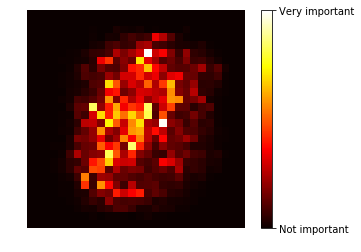

In [19]:
def plot_digit(data):
  
  image = data.reshape(28, 28)
  
  plt.imshow(image, cmap = mpl.cm.hot, interpolation="nearest")
  
  plt.axis("off")


plot_digit(rnd_clf_mnist.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf_mnist.feature_importances_.min(), rnd_clf_mnist.feature_importances_.max()])

cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()

# Boosting

## Adaptive Boost (AdaBoost)

***$Weighted \ error \ rate \  of\ the\ j^{th}\ predictor$***
\begin{align}
\\ \\
r_j = \frac{ \sum_{i=1}^m w^{(i)} \ \\ \\ \\ \\ \hat{y}^{(i)}_j \neq y^{(i)} }{\sum_{i=1}^m w^{(i)}}  \ \ \ \ \ \ where \ \hat{y}^{(i)}_j is \ the \ j^{th} \ predictor's \ prediction \ for \ the \ i^{th} \ instance
\\ \\ \\
\end{align}

***$Predictor\ Weight:$***
\begin{align}
\alpha_j & = \eta \log \frac{1-r_j}{r_j}
\end{align}

***$Weight\ Update\ Rule$***
\begin{align}
for\ i& = 1,\ 2,\ 3,\ \dots,\ m \\
w^{(i)}
\begin{cases}
w^{(i)}\ \ \ \ \ \ \ \ \ \ \ \  \ \ \ \ \  \ \ \ if\ \hat{y}^{(i)}_j = y^{(i)} \\
w^{(i)} \exp(\alpha_j) \ \ \ \ \ \ if\ \ \hat{y}^{(i)}_j \neq y^{(i)} \\
\end{cases}
\\ \\ 
\end{align}
$Then\ all\ the\ instance\ Weights\ are\ normalize\ devided\ by\ \sum_{i=1}^m w^{(i)}$

$AdaBoost\ Predictions: $

> $\hat{y}(x) =\underset{k}{\operatorname{argmax}} \underset{ \hat{y}_j(x = k) }{ \sum_{j=1}^N \alpha_j } \ \ \ \ \ \ \ \ where\ N\ is\ the\ number\ of\ predictions $


In [20]:
adaboost_clf = AdaBoostClassifier( DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=42)

adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

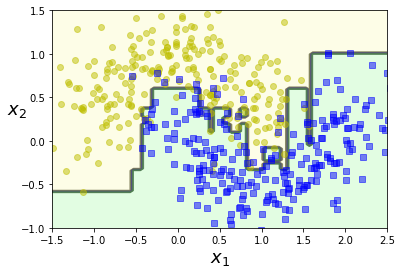

In [21]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
  
  x1s = np.linspace(axes[0], axes[1], 100)
  
  x2s = np.linspace(axes[2], axes[3], 100)
  
  x1, x2 = np.meshgrid(x1s, x2s)
  
  X_new = np.c_[x1.ravel(), x2.ravel()]
  
  y_pred = clf.predict(X_new).reshape(x1.shape)
  
  custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
  
  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
  
  if contour:
      custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
      plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
  
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
  
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
  
  plt.axis(axes)
  
  plt.xlabel(r"$x_1$", fontsize=18)
  
  plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

    
plot_decision_boundary(adaboost_clf, X, y)

In [22]:
list(m for m in dir(adaboost_clf) if not m.startswith("_") and m.endswith("_"))

['base_estimator_',
 'classes_',
 'estimator_errors_',
 'estimator_weights_',
 'estimators_',
 'feature_importances_',
 'n_classes_']

## Gradient Boosting

In [0]:
np.random.seed(42)

X = np.random.rand(100, 1) - 0.5

y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)

In [29]:
# ensemble learning - Gradient Boosting using three decsion tree regression and use not predicted instances to train next model
tree_reg1_b = DecisionTreeRegressor(max_depth=2, random_state=42)

tree_reg1_b.fit(X, y)

y2 = y - tree_reg1_b.predict(X)

tree_reg2_b = DecisionTreeRegressor(max_depth=2, random_state=42)

tree_reg2_b.fit(X, y2)

y3 = y2 - tree_reg2_b.predict(X)

tree_reg3_b = DecisionTreeRegressor(max_depth=2, random_state=42)

tree_reg3_b.fit(X, y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [31]:
X_new = np.array([[0.8]])

y_prediction = sum(tree.predict(X_new) for tree in (tree_reg1_b, tree_reg2_b, tree_reg3_b))

y_prediction

array([0.75026781])

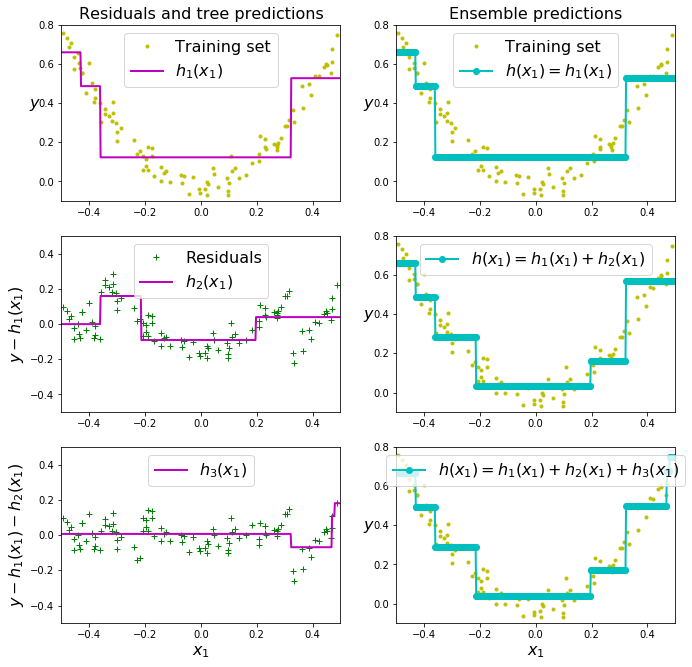

In [42]:
def plot_predictions(regressors, X, y, axes, label=None, style="c-o", data_style="y.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)



plt.figure(figsize=(11,11))


plt.subplot(321)
plot_predictions([tree_reg1_b], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="m-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1_b], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2_b], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="m-", data_style="g+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1_b, tree_reg2_b], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3_b], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="m-", data_style="g+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1_b, tree_reg2_b, tree_reg3_b], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

In [44]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)

gbrt.fit(X, y)

gbrt_2 = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)

gbrt_2.fit(X, y)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

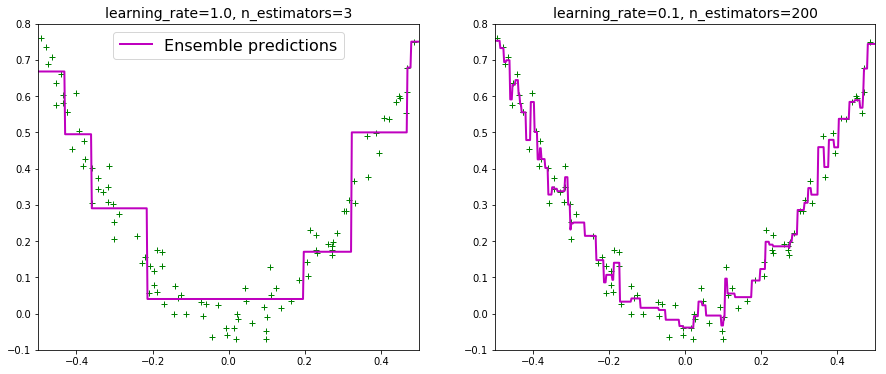

In [52]:
plt.figure(figsize=(15,6))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions", style="m-", data_style="g+")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style="m-", data_style="g+")
plt.title("learning_rate={}, n_estimators={}".format(gbrt_2.learning_rate, gbrt_2.n_estimators), fontsize=14)

plt.show()

In [62]:
# using early stop to find the best number of trees
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)

gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]

bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators, random_state=42)

gbrt_best.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=55,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [64]:
min_error = np.min(errors)


0.002712853325235463

In [66]:
# same method but different implementation for early stop(after 5 rounds of divergment)
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")

error_going_up = 0

for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break 



print(gbrt.n_estimators)

print("Minimum validation MSE:", min_val_error)

61
Minimum validation MSE: 0.002712853325235463
